<h1 style="color:purple">Prac 8 : Back Propagation</h1>

**732_Saksham**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
# iris dataset

import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = load_iris()

# to make dataset

# sklearn always provides data with (data , target)

In [4]:
x = data.data

# data

In [5]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y = data.target

# target

In [7]:
y

# scalar values of y


# 3 Neurons on Output Layer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# making y ( scalar to vector form)


res = np.zeros((y.size, 3), dtype = int)

res[np.arange(y.size), y] = 1

res


# 1 = 1, 0, 0
# 2 = 0, 1, 0

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,res,test_size=20,random_state=1)

In [10]:
y_train.size

390

In [11]:
learning_rate = 0.1

# our Back-propagation will iterate for 5000 times.
# (by default it takes 1000)
iteration = 5000

# N = y_train.size
n = y_train.size

input_size = 4
# 4 input feaures (patel_length, width etc)

hidden_size = 2

output_size = 3
# 3 outputs

results = pd.DataFrame(columns=['mse'])
# to measure permformance of each
# Iteration and Save it in results.
# using Mean Squared error

In [12]:
results

,mse


In [13]:
np.random.seed(10)

w1 = np.random.normal(scale = 0.5, size = (input_size, hidden_size))

In [14]:
w1

# 4 (input) * 2 (Hidden)

array([[ 0.66579325,  0.35763949],
       [-0.77270015, -0.00419192],
       [ 0.31066799, -0.36004278],
       [ 0.13275579,  0.05427426]])

In [15]:
w2 = np.random.normal(scale = 0.5, size = (hidden_size, output_size))

w2

# 6 weights will be assigned

array([[ 0.00214572, -0.08730011,  0.21651309],
       [ 0.60151869, -0.48253284,  0.51413704]])

In [16]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [17]:
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2 * y_pred.size)


# to calculate Mean Squared Error

In [18]:
for itr in range(iteration):
#   Implementing  feedfordward propagation on hidden layer
    z1 = np.dot(x, w1)  #net input calculate
    a1 = sigmoid(z1)    #Giving net input to Activation func
    
# a1 will have 2 values (H1, H2)
# from Input Layer to Hidden Layer

    
#     Implementing feed fordward propagation on output layer
    
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)
# a2 will have 3 values (As we have 3 outputs)
# from Hidden Layer to Output Layer
    
     
#         Calculating the error
        
    mse = mean_squared_error(a2, res)
#     a2 = Our output
#     res = target op
    
    results = results.append({'mse' : mse}, ignore_index=True)
    
    #backward propagation phase
    
    e1 = a2 - res  #calculation of error
    dw1 = e1 * a2 * (1 - a2) #delta-hidden and output
    
    e2 = np.dot(dw1, w2.T)
    dw2 = e2 * a1 * (1 - a1) 
    
#     updating the weights
    
    w2_update = np.dot(a1.T, dw1) / n    #hidden to output
    
    w1_update = np.dot(x.T, dw2) / n    #input to hidden
    
    
    w2 = w2 - learning_rate * w2_update
    w1 = w1 - learning_rate * w1_update
    

In [19]:
results

,mse
0,0.13762
1,0.137258
2,0.136898
3,0.136541
4,0.136186
...,...
4995,0.058558
4996,0.058557
4997,0.058556
4998,0.058555


<AxesSubplot:>

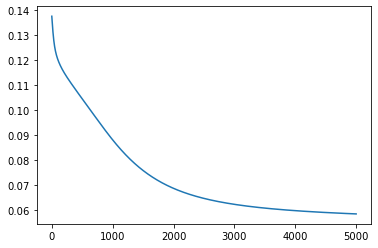

In [20]:
results.mse.plot()

# plot("Mean Squared Error")